<a href="https://colab.research.google.com/github/Hamsini-Harini/DI_Bootcamp/blob/main/DI_The_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Market Analysis - U.S. Honey Market



## About this project

This project addresses the need to understand the U.S. market's potential for a unique herbal honey product launch, considering the rising demand for health-focused, natural foods.

The project provides data-driven insights into consumption, supply and demand,
 various geographies and cost alnalysis enabling informed decision-making for product launch strategies, pricing, and geographic focus.

## Input and Data Sources

Data has been slighlty pre-processed in Excell.

**National Agricultural Statistics Service - U.S. Department of Agriculture**
1.   [US Honey Production and Trade](https://www.ers.usda.gov/webdocs/DataFiles/53304/Group%208%20Tables%20-%20US%20Honey%20Production%20and%20Trade.xlsx?v=699)
2.   [Honey](https://usda.library.cornell.edu/concern/publications/hd76s004z?locale=en)
3.   [Honey Bee Colonies](https://usda.library.cornell.edu/concern/publications/rn301137d?locale=en)
4. Amazon latest sales data



## Loading data into Pandas DataFrames


### Mounting Google Drive in Colab

In [ ]:
from google.colab import drive
import pandas as pd

drive.flush_and_unmount()  # Clears cache and unmounts the drive
# useful if changes made to file

# Mount Google Drive
drive.mount('/content/drive')

# Define paths for Excel files in Google Drive
honey_market_path = '/content/drive/Othercomputers/PC2/Final_Project/Honey_Market.xlsx'

# I NEED TO ADD ANOTHER DATABASE HERE OR NO - CREATE ANOTHER H1

Mounted at /content/drive


### Loading

In [ ]:
# Load all sheets as a dictionary of DataFrames
sheets_dict = pd.read_excel(honey_market_path, sheet_name=None)

# Access each DataFrame by sheet name from the dictionary
for sheet_name, df in sheets_dict.items():
    print(f"DataFrame: {sheet_name}")
    print(df.head(), "\n")

# Remember that from now on this approach requires accessing DataFrames with sheets_dict['SheetName']
# This is why it's more readable and conviniet to assign new variable to every sheet.

production_and_trade = sheets_dict['Production_and_Trade']
producing_states = sheets_dict['Producing_States']
imports = sheets_dict['Imports']

DataFrame: Production_and_Trade
   Year  Colonies_Thousands  Yield_Colony(lb)  Production_Mil(lb)  \
0  1986                3205         62.527301             200.400   
1  1987                3316         71.000000             235.436   
2  1988                3370         66.100000             222.757   
3  1989                3528         51.200113             180.634   
4  1990                3220         61.700000             198.674   

   Imports_Mil(lb)  Exports_Mil(lb)  Stocks_Mil(lb)  Domestic_Use_Mil(lb)  \
0       120.000000         9.200000          27.704            310.079487   
1        58.300000        12.400000          34.090            274.950000   
2        55.900000        14.000000          32.685            266.062000   
3        77.271362         9.949021          33.192            247.449341   
4        77.038774        12.430985          31.093            265.380789   

   Avg_Price_PerLb_Cents  Production_Value_Tho_Usd  US_Population(Mil)  \
0               

## Cleaning data (handling missing values, duplicates, etc.)


In [ ]:
# Iterate through each sheet in the dictionary of DataFrames
# And perform data cleaning functions

for sheet_name, df in sheets_dict.items():
    print(f"--- Cleaning DataFrame: {sheet_name} ---\n")

    # Check the shape of the DataFrame
    print(f"Shape of {sheet_name}: {df.shape}")

    # Summary statistics
    print(f"Description of {sheet_name}:\n{df.describe(include='all')}\n")

    # Check for missing values
    missing_values = df.isnull().sum()
    print(f"Missing values in {sheet_name}:\n{missing_values[missing_values > 0]}\n")

    # Check for null values
    null_values = df.isna().sum()
    print(f"Null values in {sheet_name}:\n{null_values[null_values > 0]}\n")

    # Check for duplicates
    duplicates = df.duplicated().sum()
    print(f"Number of duplicate rows in {sheet_name}: {duplicates}\n")

--- Cleaning DataFrame: Production_and_Trade ---

Shape of Production_and_Trade: (38, 12)
Description of Production_and_Trade:
              Year  Colonies_Thousands  Yield_Colony(lb)  Production_Mil(lb)  \
count    38.000000           38.000000         38.000000           38.000000   
mean   2004.500000         2740.578947         65.420321          179.037763   
std      11.113055          287.605739          9.998992           31.464258   
min    1986.000000         2342.000000         46.993251          125.331000   
25%    1995.250000         2559.000000         57.060176          150.664500   
50%    2004.500000         2658.000000         65.301710          177.386000   
75%    2013.750000         2804.750000         72.721005          202.401000   
max    2023.000000         3528.000000         84.014493          235.436000   

       Imports_Mil(lb)  Exports_Mil(lb)  Stocks_Mil(lb)  Domestic_Use_Mil(lb)  \
count        38.000000        38.000000       38.000000             38.

In [ ]:
# Iterate over each sheet to display column data types
for sheet_name, df in sheets_dict.items():
    print(f"--- Data Types in DataFrame: {sheet_name} ---")
    print(df.dtypes)
    print("\n")

--- Data Types in DataFrame: Production_and_Trade ---
Year                                  int64
Colonies_Thousands                    int64
Yield_Colony(lb)                    float64
Production_Mil(lb)                  float64
Imports_Mil(lb)                     float64
Exports_Mil(lb)                     float64
Stocks_Mil(lb)                      float64
Domestic_Use_Mil(lb)                float64
Avg_Price_PerLb_Cents               float64
Production_Value_Tho_Usd            float64
US_Population(Mil)                  float64
Honey_Per_Capita_Consumption(lb)    float64
dtype: object


--- Data Types in DataFrame: Producing_States ---
Year                         object
Colonies_Thousands          float64
Yield_Colony(lb)            float64
Production_Tho(lb)          float64
 Stocks_Tho(lb)             float64
Avg_Price_PerLb_Cents       float64
Production_Value_Tho_Usd    float64
dtype: object


--- Data Types in DataFrame: Imports ---
Country     object
1989       float64
1990 

Years should be converted to int64
Below code recognizes both column names that are purely numeric (e.g., 1989) and a column named "Year".

In [ ]:
# Iterate over each sheet to convert year columns to int64
for sheet_name, df in sheets_dict.items():
    print(f"--- Processing DataFrame: {sheet_name} ---")

    # Identify columns that represent years by either numeric names or being named 'Year'
    year_columns = [col for col in df.columns if str(col).isdigit() or str(col).lower() == 'year']

    for col in year_columns:
        # Convert column to numeric, forcing errors to NaN, then convert to int
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)

    # Display updated data types for the identified year columns
    print(f"Updated data types in {sheet_name}:\n{df[year_columns].dtypes}\n")

--- Processing DataFrame: Production_and_Trade ---
Updated data types in Production_and_Trade:
Year    int64
dtype: object

--- Processing DataFrame: Producing_States ---
Updated data types in Producing_States:
Year    int64
dtype: object

--- Processing DataFrame: Imports ---
Updated data types in Imports:
1989    int64
1990    int64
1991    int64
1992    int64
1993    int64
1994    int64
1995    int64
1996    int64
1997    int64
1998    int64
1999    int64
2000    int64
2001    int64
2002    int64
2003    int64
2004    int64
2005    int64
2006    int64
2007    int64
2008    int64
2009    int64
2010    int64
2011    int64
2012    int64
2013    int64
2014    int64
2015    int64
2016    int64
2017    int64
2018    int64
2019    int64
2020    int64
2021    int64
2022    int64
2023    int64
dtype: object



In [ ]:
# Iterate over each sheet AGAIN to display column data types
for sheet_name, df in sheets_dict.items():
    print(f"--- Data Types in DataFrame: {sheet_name} ---")
    print(df.dtypes)
    print("\n")

--- Data Types in DataFrame: Production_and_Trade ---
Year                                  int64
Colonies_Thousands                    int64
Yield_Colony(lb)                    float64
Production_Mil(lb)                  float64
Imports_Mil(lb)                     float64
Exports_Mil(lb)                     float64
Stocks_Mil(lb)                      float64
Domestic_Use_Mil(lb)                float64
Avg_Price_PerLb_Cents               float64
Production_Value_Tho_Usd            float64
US_Population(Mil)                  float64
Honey_Per_Capita_Consumption(lb)    float64
dtype: object


--- Data Types in DataFrame: Producing_States ---
Year                          int64
Colonies_Thousands          float64
Yield_Colony(lb)            float64
Production_Tho(lb)          float64
 Stocks_Tho(lb)             float64
Avg_Price_PerLb_Cents       float64
Production_Value_Tho_Usd    float64
dtype: object


--- Data Types in DataFrame: Imports ---
Country    object
1989        int64
1990   

All data types look good now.

## Data transformation (sorting, filtering, grouping, etc.)


Solving the mixed header problem

In [ ]:
# Reload the 'Producing_States' sheet to ensure we start fresh
producing_states = pd.read_excel(honey_market_path, sheet_name='Producing_States')

# Insert a new 'State' column before 'Year'
producing_states.insert(0, 'State', '')

# Variable to hold the current state
current_state = None

# Loop through rows to populate the 'State' column
for index, row in producing_states.iterrows():
    # Check if the 'Year' column contains a numeric value (indicating data rows)
    if pd.notnull(pd.to_numeric(row['Year'], errors='coerce')):
        # If it's a year, assign the current state to this row
        producing_states.at[index, 'State'] = current_state
    else:
        # If it's not a year, assume it's a state name and update `current_state`
        current_state = row['Year']

# Filter out rows where 'Year' is not numeric (these are state rows, not actual data)
producing_states = producing_states[pd.to_numeric(producing_states['Year'], errors='coerce').notna()]

# Reset index for a clean DataFrame
producing_states.reset_index(drop=True, inplace=True)

# Display the first few rows to verify the result
print(producing_states.head())


           State  Year  Colonies_Thousands  Yield_Colony(lb)  \
0  United States  1986              3205.0         62.527301   
1  United States  1987              3316.0         71.000000   
2  United States  1988              3370.0         66.100000   
3  United States  1989              3528.0         51.200113   
4  United States  1990              3220.0         61.700000   

   Production_Tho(lb)   Stocks_Tho(lb)  Avg_Price_PerLb_Cents  \
0            200400.0          27704.0                   51.1   
1            235436.0          34090.0                   50.3   
2            222757.0          32685.0                   50.0   
3            180634.0          33192.0                   49.8   
4            198674.0          31093.0                   53.7   

   Production_Value_Tho_Usd  
0                102404.400  
1                118424.308  
2                111378.500  
3                 89955.732  
4                106687.938  


## Feature Engineering



In [ ]:
# Introduce Honey Production Per Capita
production_and_trade['Honey_Production_Per_Capita'] = production_and_trade['Production_Mil(lb)'] / production_and_trade['US_Population(Mil)']
production_and_trade[['Year', 'Production_Mil(lb)', 'US_Population(Mil)', 'Honey_Production_Per_Capita']].head()

,Year,Production_Mil(lb),US_Population(Mil),Honey_Production_Per_Capita
0,1986,200.400,240.132887,0.834538
1,1987,235.436,242.288918,0.971716
2,1988,222.757,244.498982,0.911075
3,1989,180.634,246.819230,0.731847
4,1990,198.674,249.464000,0.796403


In [ ]:
# Introduce Imports Per Capita
production_and_trade['Imports_Per_Capita'] = production_and_trade['Imports_Mil(lb)'] / production_and_trade['US_Population(Mil)']

# Verify the calculation
production_and_trade[['Year', 'Imports_Mil(lb)', 'US_Population(Mil)', 'Imports_Per_Capita']].head()

,Year,Imports_Mil(lb),US_Population(Mil),Imports_Per_Capita
0,1986,120.000000,240.132887,0.499723
1,1987,58.300000,242.288918,0.240622
2,1988,55.900000,244.498982,0.228631
3,1989,77.271362,246.819230,0.313069
4,1990,77.038774,249.464000,0.308817


In [ ]:
# Self-Sufficiency Ratio - the higher the number higher the self-sufficiency
# How much of domestic domand is satisfied by domestic production
production_and_trade['Self_Sufficiency_Ratio'] = production_and_trade['Production_Mil(lb)'] / production_and_trade['Domestic_Use_Mil(lb)']

# Verify
production_and_trade[['Year', 'Production_Mil(lb)', 'Domestic_Use_Mil(lb)', 'Self_Sufficiency_Ratio']].head()

,Year,Production_Mil(lb),Domestic_Use_Mil(lb),Self_Sufficiency_Ratio
0,1986,200.400,310.079487,0.646286
1,1987,235.436,274.950000,0.856287
2,1988,222.757,266.062000,0.837237
3,1989,180.634,247.449341,0.729984
4,1990,198.674,265.380789,0.748637


In [ ]:
# Calculate Export Ratio - what part of domestic production is exported
production_and_trade['Export_Ratio'] = production_and_trade['Exports_Mil(lb)'] / production_and_trade['Production_Mil(lb)']

# Verify
production_and_trade[['Year', 'Exports_Mil(lb)', 'Production_Mil(lb)', 'Export_Ratio']].head()

,Year,Exports_Mil(lb),Production_Mil(lb),Export_Ratio
0,1986,9.200000,200.400,0.045908
1,1987,12.400000,235.436,0.052668
2,1988,14.000000,222.757,0.062849
3,1989,9.949021,180.634,0.055078
4,1990,12.430985,198.674,0.062570


In [ ]:
# Introduce Revenue per Colony
production_and_trade['Revenue_per_Colony'] = production_and_trade['Production_Value_Tho_Usd'] / production_and_trade['Colonies_Thousands']

# Verify
production_and_trade[['Year', 'Production_Value_Tho_Usd', 'Colonies_Thousands', 'Revenue_per_Colony']].head()


,Year,Production_Value_Tho_Usd,Colonies_Thousands,Revenue_per_Colony
0,1986,102404.400,3205,31.951451
1,1987,118424.308,3316,35.713000
2,1988,111378.500,3370,33.050000
3,1989,89955.732,3528,25.497656
4,1990,106687.938,3220,33.132900


In [ ]:
# Introducing Supply-Demand Balance
production_and_trade['Supply_Demand_Balance'] = production_and_trade['Production_Mil(lb)'] - production_and_trade['Domestic_Use_Mil(lb)']

# Verify
production_and_trade[['Year', 'Production_Mil(lb)', 'Domestic_Use_Mil(lb)', 'Supply_Demand_Balance']].head()


,Year,Production_Mil(lb),Domestic_Use_Mil(lb),Supply_Demand_Balance
0,1986,200.400,310.079487,-109.679487
1,1987,235.436,274.950000,-39.514000
2,1988,222.757,266.062000,-43.305000
3,1989,180.634,247.449341,-66.815341
4,1990,198.674,265.380789,-66.706789


Adding features for the second sheet

In [ ]:
# Calculate Production per Colony
producing_states['Production_per_Colony'] = producing_states['Production_Tho(lb)'] / producing_states['Colonies_Thousands']

# Verify
producing_states[['Year', 'Production_Tho(lb)', 'Colonies_Thousands', 'Production_per_Colony']].head()

,Year,Production_Tho(lb),Colonies_Thousands,Production_per_Colony
0,1986,200400.0,3205.0,62.527301
1,1987,235436.0,3316.0,71.000000
2,1988,222757.0,3370.0,66.100000
3,1989,180634.0,3528.0,51.200113
4,1990,198674.0,3220.0,61.700000


In [ ]:
# Calculate Stocks as a Percentage of Production
producing_states['Stocks_Percentage_of_Production'] = (producing_states[' Stocks_Tho(lb)'] / producing_states['Production_Tho(lb)']) * 100

# Verify
producing_states[['Year', 'Production_Tho(lb)', ' Stocks_Tho(lb)', 'Stocks_Percentage_of_Production']].head()

,Year,Production_Tho(lb),Stocks_Tho(lb),Stocks_Percentage_of_Production
0,1986,200400.0,27704.0,13.824351
1,1987,235436.0,34090.0,14.479519
2,1988,222757.0,32685.0,14.672940
3,1989,180634.0,33192.0,18.375278
4,1990,198674.0,31093.0,15.650261


In [ ]:
# Calculate Rolling Standard Deviation (3-year window) for Yield_Colony(lb)
producing_states['Yield_Rolling_StdDev'] = producing_states['Yield_Colony(lb)'].rolling(window=3).std()

# Verify
producing_states[['Year', 'Yield_Colony(lb)', 'Yield_Rolling_StdDev']].head(10)  # Displaying more rows to see the rolling effect

,Year,Yield_Colony(lb),Yield_Rolling_StdDev
0,1986,62.527301,NaN
1,1987,71.000000,NaN
2,1988,66.100000,4.253642
3,1989,51.200113,10.312227
4,1990,61.700000,7.655219
5,1991,68.800062,8.854535
6,1992,72.800000,5.621690
7,1993,80.200000,5.783858
8,1994,78.399928,3.859176
9,1995,79.500188,0.907429


## Numerical computations - adding Inflation Adjusted Price

In [ ]:
import pandas_datareader as pdr
from datetime import datetime

# Retrieve CPI data from FRED (Federal Reserve Economic Data)
cpi_data = pdr.DataReader("CPIAUCSL", "fred", start="1980-01-01", end="2024-01-01")

# Resample to annual data by taking the mean of each year
cpi_data = cpi_data.resample('A').mean()
cpi_data.index = cpi_data.index.year  # Set index to year only for easy access
cpi_data.columns = ['CPI']

# Define the target year for adjustment and get the target CPI value (e.g., CPI for 2024)
target_year = 2024
target_cpi = cpi_data.loc[target_year, 'CPI']

# Now calculate Inflation-Adjusted Price directly without merging CPI data
def calculate_inflation_adjusted_price(row, target_cpi, cpi_data):
    # Get the CPI for the year in the row
    cpi_for_year = cpi_data.loc[row['Year'], 'CPI']
    # Calculate the adjusted price
    return row['Avg_Price_PerLb_Cents'] * target_cpi / cpi_for_year

# Apply the function to each row in the DataFrame
production_and_trade['Inflation_Adjusted_Price'] = production_and_trade.apply(
    calculate_inflation_adjusted_price, axis=1, target_cpi=target_cpi, cpi_data=cpi_data
)

# Display the first few rows to verify the calculation
production_and_trade[['Year', 'Avg_Price_PerLb_Cents', 'Inflation_Adjusted_Price']].head()

<ipython-input-17-3885988f5df8>:8: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  cpi_data = cpi_data.resample('A').mean()


,Year,Avg_Price_PerLb_Cents,Inflation_Adjusted_Price
0,1986,51.1,144.267144
1,1987,50.3,137.102733
2,1988,50.0,130.917354
3,1989,49.8,124.432029
4,1990,53.7,127.279172


In [ ]:
production_and_trade.head()

,Year,Colonies_Thousands,Yield_Colony(lb),Production_Mil(lb),Imports_Mil(lb),Exports_Mil(lb),Stocks_Mil(lb),Domestic_Use_Mil(lb),Avg_Price_PerLb_Cents,Production_Value_Tho_Usd,US_Population(Mil),Honey_Per_Capita_Consumption(lb),Honey_Production_Per_Capita,Imports_Per_Capita,Self_Sufficiency_Ratio,Export_Ratio,Revenue_per_Colony,Supply_Demand_Balance,Inflation_Adjusted_Price
0,1986,3205,62.527301,200.400,120.000000,9.200000,27.704,310.079487,51.1,102404.400,240.132887,1.291283,0.834538,0.499723,0.646286,0.045908,31.951451,-109.679487,144.267144
1,1987,3316,71.000000,235.436,58.300000,12.400000,34.090,274.950000,50.3,118424.308,242.288918,1.134802,0.971716,0.240622,0.856287,0.052668,35.713000,-39.514000,137.102733
2,1988,3370,66.100000,222.757,55.900000,14.000000,32.685,266.062000,50.0,111378.500,244.498982,1.088193,0.911075,0.228631,0.837237,0.062849,33.050000,-43.305000,130.917354
3,1989,3528,51.200113,180.634,77.271362,9.949021,33.192,247.449341,49.8,89955.732,246.819230,1.002553,0.731847,0.313069,0.729984,0.055078,25.497656,-66.815341,124.432029
4,1990,3220,61.700000,198.674,77.038774,12.430985,31.093,265.380789,53.7,106687.938,249.464000,1.063804,0.796403,0.308817,0.748637,0.062570,33.132900,-66.706789,127.279172


In [ ]:
# Drop the redundant CPI columns
production_and_trade = production_and_trade.drop(columns=['CPI_x', 'CPI_y', 'CPI'], errors='ignore')

# Verify by displaying the first few rows
production_and_trade.head()

,Year,Colonies_Thousands,Yield_Colony(lb),Production_Mil(lb),Imports_Mil(lb),Exports_Mil(lb),Stocks_Mil(lb),Domestic_Use_Mil(lb),Avg_Price_PerLb_Cents,Production_Value_Tho_Usd,US_Population(Mil),Honey_Per_Capita_Consumption(lb),Honey_Production_Per_Capita,Imports_Per_Capita,Self_Sufficiency_Ratio,Export_Ratio,Revenue_per_Colony,Supply_Demand_Balance,Inflation_Adjusted_Price
0,1986,3205,62.527301,200.400,120.000000,9.200000,27.704,310.079487,51.1,102404.400,240.132887,1.291283,0.834538,0.499723,0.646286,0.045908,31.951451,-109.679487,144.267144
1,1987,3316,71.000000,235.436,58.300000,12.400000,34.090,274.950000,50.3,118424.308,242.288918,1.134802,0.971716,0.240622,0.856287,0.052668,35.713000,-39.514000,137.102733
2,1988,3370,66.100000,222.757,55.900000,14.000000,32.685,266.062000,50.0,111378.500,244.498982,1.088193,0.911075,0.228631,0.837237,0.062849,33.050000,-43.305000,130.917354
3,1989,3528,51.200113,180.634,77.271362,9.949021,33.192,247.449341,49.8,89955.732,246.819230,1.002553,0.731847,0.313069,0.729984,0.055078,25.497656,-66.815341,124.432029
4,1990,3220,61.700000,198.674,77.038774,12.430985,31.093,265.380789,53.7,106687.938,249.464000,1.063804,0.796403,0.308817,0.748637,0.062570,33.132900,-66.706789,127.279172


## Save Edited DataFrames to a New Excel Workbook


In [ ]:
# Define the path for saving within Colab
output_path_colab = '/content/Honey_Market_Updated.xlsx'

# Save each DataFrame to a separate sheet in the new Excel file within Colab
with pd.ExcelWriter(output_path_colab) as writer:
    production_and_trade.to_excel(writer, sheet_name='Production_and_Trade', index=False)
    producing_states.to_excel(writer, sheet_name='Producing_States', index=False)
    imports.to_excel(writer, sheet_name='Imports', index=False)

print("DataFrames saved to 'Honey_Market_Updated.xlsx' in Colab.")

from google.colab import files

# Download the file to your local machine
files.download(output_path_colab)


DataFrames saved to 'Honey_Market_Updated.xlsx' in Colab.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Statistical Analysis and Modeling

### Distribution of yields per colony

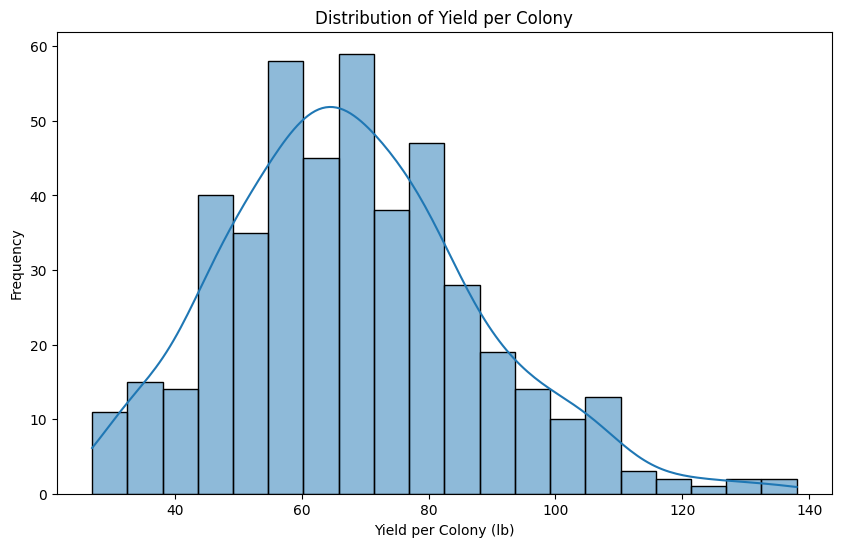

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of 'Yield_Colony(lb)' in the 'producing_states' DataFrame
plt.figure(figsize=(10, 6))

# Histogram
sns.histplot(producing_states['Yield_Colony(lb)'], kde=True, bins=20)
plt.title('Distribution of Yield per Colony')
plt.xlabel('Yield per Colony (lb)')
plt.ylabel('Frequency')

# Show the plot
plt.show()


### Correlation Analysis - which feature correlates most strongly with the price of honey.

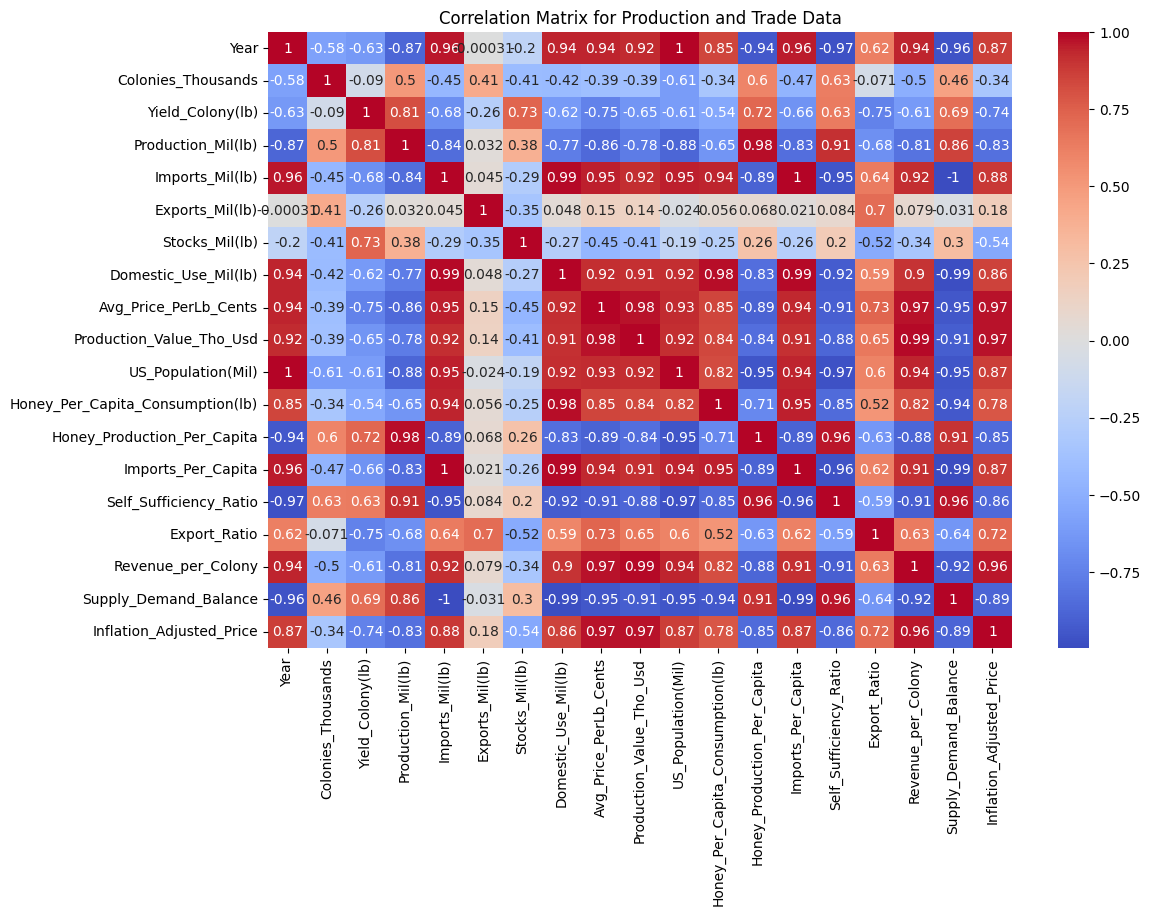

,Avg_Price_PerLb_Cents
Avg_Price_PerLb_Cents,1.000000
Production_Value_Tho_Usd,0.975920
Revenue_per_Colony,0.972834
Inflation_Adjusted_Price,0.971161
Imports_Mil(lb),0.947952
Year,0.944089
Imports_Per_Capita,0.935023
US_Population(Mil),0.929485
Domestic_Use_Mil(lb),0.921123
Honey_Per_Capita_Consumption(lb),0.845705


In [ ]:
# Calculate the correlation matrix for the 'production_and_trade' DataFrame
correlation_matrix = production_and_trade.corr()

# Display the correlation values of each feature with 'Avg_Price_PerLb_Cents'
correlation_with_price = correlation_matrix['Avg_Price_PerLb_Cents'].sort_values(ascending=False)

# Display the correlation matrix as a heatmap for visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title('Correlation Matrix for Production and Trade Data')
plt.show()

# Output the sorted correlations with the 'Avg_Price_PerLb_Cents' feature
correlation_with_price


Interesting correlations to note : Imports, Exports Year and Supply_Demand balance

### Predictions

#### Future Honey Consumption based on historical *data*

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare the data
# Reshape the 'Year' column for modeling and set up the target variable (Domestic honey consumption)
X = production_and_trade['Year'].values.reshape(-1, 1)
y = production_and_trade['Domestic_Use_Mil(lb)'].values

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict future consumption for the next 10 years
future_years = np.arange(X[-1][0] + 1, X[-1][0] + 11).reshape(-1, 1)
predicted_consumption = model.predict(future_years)

# Display predictions alongside the future years
predictions = pd.DataFrame({'Year': future_years.flatten(), 'Predicted_Domestic_Use_Mil(lb)': predicted_consumption})
predictions


,Year,Predicted_Domestic_Use_Mil(lb)
0,2024,578.856961
1,2025,587.670945
2,2026,596.484929
3,2027,605.298913
4,2028,614.112897
5,2029,622.926881
6,2030,631.740865
7,2031,640.554849
8,2032,649.368833
9,2033,658.182817


In [ ]:
# Adding Year-over-Year Growth column to the predictions variable
predictions = pd.DataFrame({
    'Year': [2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033],
    'Predicted_Domestic_Use_Mil(lb)': [
        578.856961, 587.670945, 596.484929, 605.298913, 614.112897,
        622.926881, 631.740865, 640.554849, 649.368833, 658.182817
    ]
})

# Calculate year-over-year growth as a percentage
predictions['YoY_Growth_%'] = predictions['Predicted_Domestic_Use_Mil(lb)'].pct_change() * 100

predictions


,Year,Predicted_Domestic_Use_Mil(lb),YoY_Growth_%
0,2024,578.856961,NaN
1,2025,587.670945,1.522653
2,2026,596.484929,1.499816
3,2027,605.298913,1.477654
4,2028,614.112897,1.456137
5,2029,622.926881,1.435238
6,2030,631.740865,1.414931
7,2031,640.554849,1.395190
8,2032,649.368833,1.375992
9,2033,658.182817,1.357316


Predicting future price of honey

In [ ]:
# Using the existing 'Year' column in 'predictions' to fit a linear model for honey price prediction
from sklearn.linear_model import LinearRegression

# Prepare the data for price prediction model
X_price = production_and_trade['Year'].values.reshape(-1, 1)
y_price = production_and_trade['Avg_Price_PerLb_Cents'].values

# Initialize and fit the linear regression model for price prediction
price_model = LinearRegression()
price_model.fit(X_price, y_price)

# Predict future honey prices for the same years in the predictions DataFrame
predicted_prices = price_model.predict(predictions['Year'].values.reshape(-1, 1))

# Add predicted prices to the predictions DataFrame
predictions['Predicted_Avg_Price_PerLb_Cents'] = predicted_prices

# Calculate year-over-year increase in price as a percentage
predictions['YoY_Price_Growth_%'] = predictions['Predicted_Avg_Price_PerLb_Cents'].pct_change() * 100

# Display the updated predictions DataFrame
predictions


,Year,Predicted_Domestic_Use_Mil(lb),YoY_Growth_%,Predicted_Avg_Price_PerLb_Cents,YoY_Price_Growth_%
0,2024,578.856961,NaN,255.794026,NaN
1,2025,587.670945,1.522653,262.181573,2.497145
2,2026,596.484929,1.499816,268.569121,2.436307
3,2027,605.298913,1.477654,274.956669,2.378363
4,2028,614.112897,1.456137,281.344217,2.323111
5,2029,622.926881,1.435238,287.731765,2.270368
6,2030,631.740865,1.414931,294.119313,2.219966
7,2031,640.554849,1.395190,300.506861,2.171754
8,2032,649.368833,1.375992,306.894409,2.125591
9,2033,658.182817,1.357316,313.281956,2.081350


#### Price Elasticity of Demand

In [ ]:
# Calculate percentage changes in price and quantity demanded
production_and_trade['Price_Change_%'] = production_and_trade['Avg_Price_PerLb_Cents'].pct_change() * 100
production_and_trade['Demand_Change_%'] = production_and_trade['Domestic_Use_Mil(lb)'].pct_change() * 100

# Calculate Price Elasticity of Demand (PED)
production_and_trade['PED'] = production_and_trade['Demand_Change_%'] / production_and_trade['Price_Change_%']

# Display relevant columns to interpret the results
ped_analysis = production_and_trade[['Year', 'Avg_Price_PerLb_Cents', 'Domestic_Use_Mil(lb)', 'Price_Change_%', 'Demand_Change_%', 'PED']]
ped_analysis


,Year,Avg_Price_PerLb_Cents,Domestic_Use_Mil(lb),Price_Change_%,Demand_Change_%,PED
0,1986,51.1,310.079487,NaN,NaN,NaN
1,1987,50.3,274.950000,-1.565558,-11.329188,7.236519
2,1988,50.0,266.062000,-0.596421,-3.232588,5.419972
3,1989,49.8,247.449341,-0.400000,-6.995610,17.489025
4,1990,53.7,265.380789,7.831325,7.246513,0.925324
5,1991,55.6,298.284072,3.538175,12.398517,3.504213
6,1992,55.0,323.239354,-1.079137,8.366281,-7.752753
7,1993,53.9,345.687122,-2.000000,6.944627,-3.472314
8,1994,52.8,322.241971,-2.040816,-6.782188,3.323272
9,1995,68.5,307.899136,29.734848,-4.450952,-0.149688


#### Add prediction sheet to updated excell file and download it localy



In [ ]:
# Define the path for saving the Excel file within Google Colab
output_path_colab = '/content/Honey_Market_Updated.xlsx'

# Save each DataFrame to a separate sheet, adding the 'predictions' DataFrame as a new sheet
# Use 'mode="a"' to append to the existing file, and engine='openpyxl' for compatibility with xlsx files
with pd.ExcelWriter(output_path_colab, mode='a', engine='openpyxl') as writer:
    predictions.to_excel(writer, sheet_name='Predictions', index=False)

print("Predictions DataFrame added as a new sheet to 'Honey_Market_Updated.xlsx' in Colab.")

from google.colab import files

# Download the updated file to your local machine
files.download(output_path_colab)


Predictions DataFrame added as a new sheet to 'Honey_Market_Updated.xlsx' in Colab.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Analysing another dataset - Honey Sales from Amazon

## Loading the dataset

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
import pandas as pd
file_path = '/content/drive/Othercomputers/PC2/Final_Project/Honey_Sales_Amazon.csv'
honey_sales_amazon = pd.read_csv(file_path)

# Verify
honey_sales_amazon.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,URL,ASIN,Title,Brand,Fulfillment,BSR,Price,Monthly Sales,Monthly Revenue,Review Count,...,Width,Height,Weight,Storage Fee (Jan - Sep),Storage Fee (Oct - Dec),Best Sales Period,Age (Month),Number of Images,Variation Count,Sales to Reviews
0,https://amazon.com/dp/B07H93VWCC,B07H93VWCC,Manuka Health UMF 18+/MGO 700+ Ultra High-Grad...,Manuka Health,FBA,1688,69.99,6324,442616.76,29268.0,...,3.94,4.69,0.90,31.81,87.75,10/01/2024,77,9,12,0.22
1,https://amazon.com/dp/B00CMQD3VS,B00CMQD3VS,"Nate's 100% Pure, Raw & Unfiltered Honey - Awa...",Nature Nate's,Amazon,44,9.18,55448,509012.64,62141.0,...,3.50,7.13,2.08,NaN,NaN,10/01/2024,138,6,3,0.89
2,https://amazon.com/dp/B00CMQD3TA,B00CMQD3TA,"Nate's 100% Pure, Raw & Unfiltered Honey - Awa...",Nature Nate's,Amazon,45,5.99,54360,325616.40,62136.0,...,2.24,5.75,0.82,NaN,NaN,10/01/2024,138,6,3,0.88
3,https://amazon.com/dp/B0CF483NLY,B0CF483NLY,Nature Nate's 100% Pure USDA Organic Raw & Unf...,Nature Nate's,Amazon,234,21.97,20640,453460.80,30806.0,...,7.01,7.99,2.12,NaN,NaN,10/01/2024,13,6,4,0.67
4,https://amazon.com/dp/B017TRQYJM,B017TRQYJM,"Manukora Raw Manuka Honey, MGO 850+ from New Z...",Manukora,FBA,3315,80.00,3490,279200.00,4502.0,...,2.50,3.40,0.65,10.44,28.81,05/01/2023,107,6,2,0.78


## Feature Engineering

### Revenue Per Weight Unit (Pound)

In [ ]:
# Calculate total weight sold by multiplying Monthly Sales by Weight
honey_sales_amazon['Total_Weight_Sold'] = honey_sales_amazon['Monthly Sales'] * honey_sales_amazon['Weight']

# Calculate Revenue per Pound Sold by dividing Monthly Revenue by Total Weight Sold
honey_sales_amazon['Revenue_per_Pound_Sold'] = honey_sales_amazon['Monthly Revenue'] / honey_sales_amazon['Total_Weight_Sold']

# Display relevant columns to verify
honey_sales_amazon[['Title', 'Monthly Revenue', 'Monthly Sales', 'Weight', 'Total_Weight_Sold', 'Revenue_per_Pound_Sold']].head()

,Title,Monthly Revenue,Monthly Sales,Weight,Total_Weight_Sold,Revenue_per_Pound_Sold
0,Manuka Health UMF 18+/MGO 700+ Ultra High-Grad...,442616.76,6324,0.90,5691.60,77.766667
1,"Nate's 100% Pure, Raw & Unfiltered Honey - Awa...",509012.64,55448,2.08,115331.84,4.413462
2,"Nate's 100% Pure, Raw & Unfiltered Honey - Awa...",325616.40,54360,0.82,44575.20,7.304878
3,Nature Nate's 100% Pure USDA Organic Raw & Unf...,453460.80,20640,2.12,43756.80,10.363208
4,"Manukora Raw Manuka Honey, MGO 850+ from New Z...",279200.00,3490,0.65,2268.50,123.076923


### Finding the Best sales period

In [ ]:
# Convert 'Best Sales Period' column to datetime format
honey_sales_amazon['Best Sales Period'] = pd.to_datetime(honey_sales_amazon['Best Sales Period'], errors='coerce')

# Extract only the month from 'Best Sales Period'
honey_sales_amazon['Best_Sales_Month'] = honey_sales_amazon['Best Sales Period'].dt.month

# Count occurrences of each month, ordered by the highest count
best_sales_by_month = honey_sales_amazon['Best_Sales_Month'].value_counts().sort_values(ascending=False)

# Display the results
best_sales_by_month

,count
Best_Sales_Month,
10.0,162
9.0,92
12.0,56
1.0,34
11.0,32
3.0,21
2.0,20
8.0,20
6.0,19


In [ ]:
honey_sales_amazon

,URL,ASIN,Title,Brand,Fulfillment,BSR,Price,Monthly Sales,Monthly Revenue,Review Count,...,Storage Fee (Oct - Dec),Best Sales Period,Age (Month),Number of Images,Variation Count,Sales to Reviews,Total_Weight_Sold,Revenue_per_Pound_Sold,Best_Sales_Month,Avg_Monthly_Storage_per_Weight
0,https://amazon.com/dp/B07H93VWCC,B07H93VWCC,Manuka Health UMF 18+/MGO 700+ Ultra High-Grad...,Manuka Health,FBA,1688,69.99,6324,442616.76,29268.0,...,87.75,2024-10-01,77,9,12,0.22,5691.60,77.766667,10.0,36.42716
1,https://amazon.com/dp/B00CMQD3VS,B00CMQD3VS,"Nate's 100% Pure, Raw & Unfiltered Honey - Awa...",Nature Nate's,Amazon,44,9.18,55448,509012.64,62141.0,...,NaN,2024-10-01,138,6,3,0.89,115331.84,4.413462,10.0,NaN
2,https://amazon.com/dp/B00CMQD3TA,B00CMQD3TA,"Nate's 100% Pure, Raw & Unfiltered Honey - Awa...",Nature Nate's,Amazon,45,5.99,54360,325616.40,62136.0,...,NaN,2024-10-01,138,6,3,0.88,44575.20,7.304878,10.0,NaN
3,https://amazon.com/dp/B0CF483NLY,B0CF483NLY,Nature Nate's 100% Pure USDA Organic Raw & Unf...,Nature Nate's,Amazon,234,21.97,20640,453460.80,30806.0,...,NaN,2024-10-01,13,6,4,0.67,43756.80,10.363208,10.0,NaN
4,https://amazon.com/dp/B017TRQYJM,B017TRQYJM,"Manukora Raw Manuka Honey, MGO 850+ from New Z...",Manukora,FBA,3315,80.00,3490,279200.00,4502.0,...,28.81,2023-05-01,107,6,2,0.78,2268.50,123.076923,5.0,16.558974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,https://amazon.com/dp/B000OQ2DJ6,B000OQ2DJ6,"YS Organic Bee Farms - Organic Honey, 16 oz gel",YS Eco Bee Farms,FBM,75480,22.89,92,2105.88,1108.0,...,NaN,2024-02-01,240,4,0,0.08,142.60,14.767742,2.0,NaN
496,https://amazon.com/dp/B01N5XMNTT,B01N5XMNTT,"Sourwood Honey pure, natural and raw Pint Jar ...",Julia's Pantry,FBA,100430,35.95,52,1869.40,117.0,...,353.47,2023-05-01,93,1,0,0.45,119.08,15.698690,5.0,57.668122
497,https://amazon.com/dp/B00MW1BJGY,B00MW1BJGY,Stakich Cinnamon Enriched Raw Honey - Unproces...,Stakich,FBA,74518,49.95,56,2797.20,305.0,...,224.69,2022-11-01,122,3,2,0.18,306.32,9.131627,11.0,15.34674
498,https://amazon.com/dp/B001LR2CRK,B001LR2CRK,"Stakich Cinnamon Enriched Raw Honey - Pure, Un...",Stakich,FBA,74518,28.95,56,1621.20,305.0,...,122.44,2022-11-01,191,4,2,0.18,150.64,10.762082,11.0,17.005783


### Average monthly storage fees per unit of weight of Large Standard-Size products

In [ ]:
# Create a new column for the average monthly storage fee per weight unit, initially set to NaN
honey_sales_amazon['Avg_Monthly_Storage_per_Weight'] = None

# Filter for "Large Standard-Size" products and calculate the average monthly storage fee per weight
honey_sales_amazon.loc[honey_sales_amazon['Size Tier'] == 'Large Standard-Size', 'Avg_Monthly_Storage_per_Weight'] = (
    (honey_sales_amazon['Storage Fee (Jan - Sep)'] / 9 + honey_sales_amazon['Storage Fee (Oct - Dec)'] / 3) /
    honey_sales_amazon['Weight']
)

# Display the updated DataFrame to verify the new column
honey_sales_amazon[['Title', 'Size Tier', 'Weight', 'Storage Fee (Jan - Sep)', 'Storage Fee (Oct - Dec)', 'Avg_Monthly_Storage_per_Weight']].head()


,Title,Size Tier,Weight,Storage Fee (Jan - Sep),Storage Fee (Oct - Dec),Avg_Monthly_Storage_per_Weight
0,Manuka Health UMF 18+/MGO 700+ Ultra High-Grad...,Large Standard-Size,0.90,31.81,87.75,36.42716
1,"Nate's 100% Pure, Raw & Unfiltered Honey - Awa...",Large Standard-Size,2.08,NaN,NaN,NaN
2,"Nate's 100% Pure, Raw & Unfiltered Honey - Awa...",Large Standard-Size,0.82,NaN,NaN,NaN
3,Nature Nate's 100% Pure USDA Organic Raw & Unf...,Large Standard-Size,2.12,NaN,NaN,NaN
4,"Manukora Raw Manuka Honey, MGO 850+ from New Z...",Large Standard-Size,0.65,10.44,28.81,16.558974


## Correlation between Monthly Sales, Review Count, and Reviews Rating

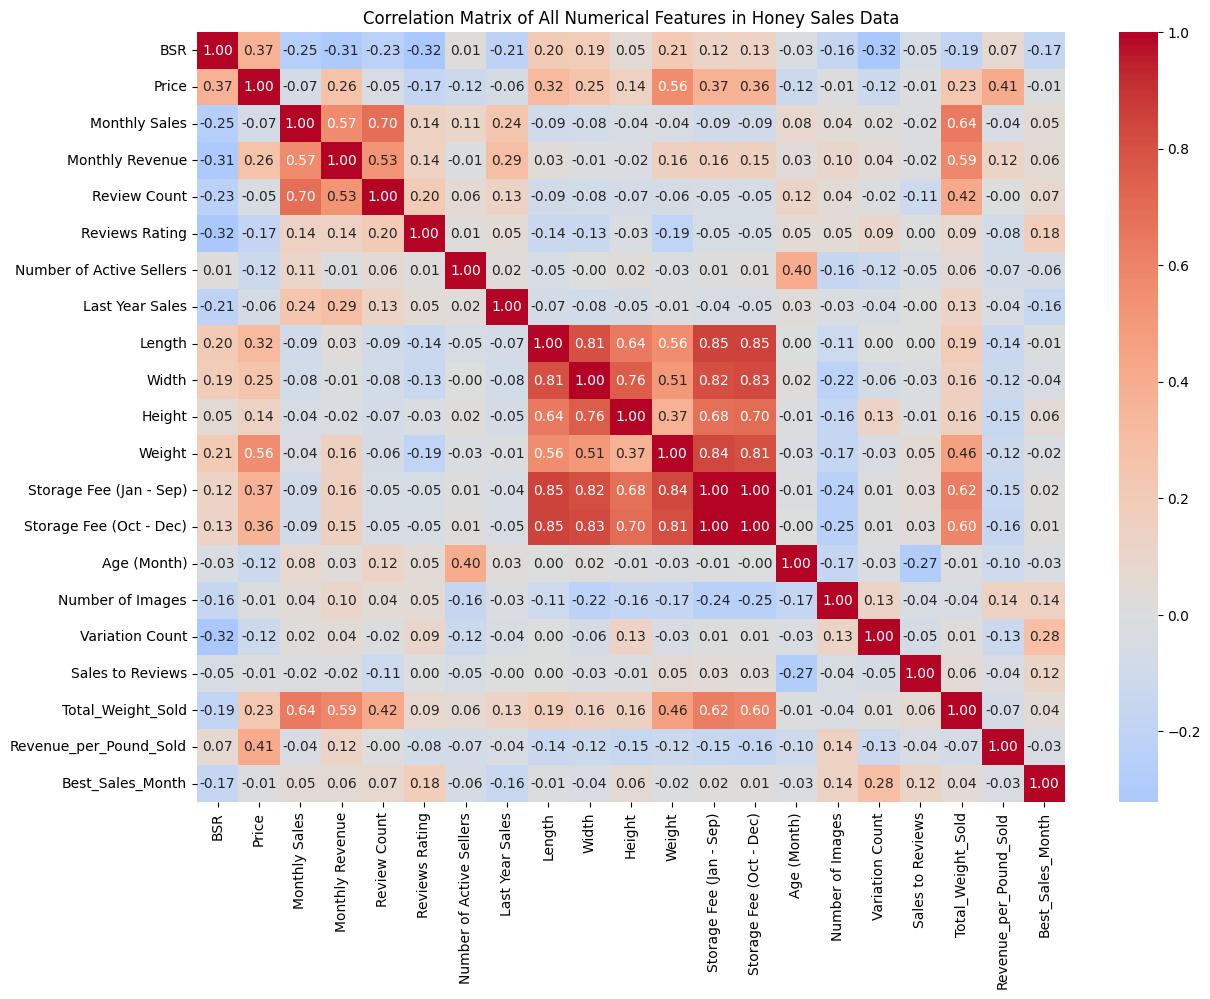

In [ ]:
# Select only numerical columns for correlation
numerical_data = honey_sales_amazon.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix for all numerical features
correlation_matrix_all = numerical_data.corr()

# Set up the figure for visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 10))

# Use a heatmap to display the correlation matrix
sns.heatmap(correlation_matrix_all, annot=True, cmap="coolwarm", center=0, fmt=".2f")

# Add titles and labels for clarity
plt.title("Correlation Matrix of All Numerical Features in Honey Sales Data")
plt.show()


We can see the strong correlation (0.7) between review count and monthly sales. Review count seems to be much more important than average review mark (rating) !

### Download dataframe as Excell file locally

In [ ]:
honey_sales_amazon

,URL,ASIN,Title,Brand,Fulfillment,BSR,Price,Monthly Sales,Monthly Revenue,Review Count,...,Storage Fee (Oct - Dec),Best Sales Period,Age (Month),Number of Images,Variation Count,Sales to Reviews,Total_Weight_Sold,Revenue_per_Pound_Sold,Best_Sales_Month,Avg_Monthly_Storage_per_Weight
0,https://amazon.com/dp/B07H93VWCC,B07H93VWCC,Manuka Health UMF 18+/MGO 700+ Ultra High-Grad...,Manuka Health,FBA,1688,69.99,6324,442616.76,29268.0,...,87.75,2024-10-01,77,9,12,0.22,5691.60,77.766667,10.0,36.42716
1,https://amazon.com/dp/B00CMQD3VS,B00CMQD3VS,"Nate's 100% Pure, Raw & Unfiltered Honey - Awa...",Nature Nate's,Amazon,44,9.18,55448,509012.64,62141.0,...,NaN,2024-10-01,138,6,3,0.89,115331.84,4.413462,10.0,NaN
2,https://amazon.com/dp/B00CMQD3TA,B00CMQD3TA,"Nate's 100% Pure, Raw & Unfiltered Honey - Awa...",Nature Nate's,Amazon,45,5.99,54360,325616.40,62136.0,...,NaN,2024-10-01,138,6,3,0.88,44575.20,7.304878,10.0,NaN
3,https://amazon.com/dp/B0CF483NLY,B0CF483NLY,Nature Nate's 100% Pure USDA Organic Raw & Unf...,Nature Nate's,Amazon,234,21.97,20640,453460.80,30806.0,...,NaN,2024-10-01,13,6,4,0.67,43756.80,10.363208,10.0,NaN
4,https://amazon.com/dp/B017TRQYJM,B017TRQYJM,"Manukora Raw Manuka Honey, MGO 850+ from New Z...",Manukora,FBA,3315,80.00,3490,279200.00,4502.0,...,28.81,2023-05-01,107,6,2,0.78,2268.50,123.076923,5.0,16.558974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,https://amazon.com/dp/B000OQ2DJ6,B000OQ2DJ6,"YS Organic Bee Farms - Organic Honey, 16 oz gel",YS Eco Bee Farms,FBM,75480,22.89,92,2105.88,1108.0,...,NaN,2024-02-01,240,4,0,0.08,142.60,14.767742,2.0,NaN
496,https://amazon.com/dp/B01N5XMNTT,B01N5XMNTT,"Sourwood Honey pure, natural and raw Pint Jar ...",Julia's Pantry,FBA,100430,35.95,52,1869.40,117.0,...,353.47,2023-05-01,93,1,0,0.45,119.08,15.698690,5.0,57.668122
497,https://amazon.com/dp/B00MW1BJGY,B00MW1BJGY,Stakich Cinnamon Enriched Raw Honey - Unproces...,Stakich,FBA,74518,49.95,56,2797.20,305.0,...,224.69,2022-11-01,122,3,2,0.18,306.32,9.131627,11.0,15.34674
498,https://amazon.com/dp/B001LR2CRK,B001LR2CRK,"Stakich Cinnamon Enriched Raw Honey - Pure, Un...",Stakich,FBA,74518,28.95,56,1621.20,305.0,...,122.44,2022-11-01,191,4,2,0.18,150.64,10.762082,11.0,17.005783


In [ ]:
# Import necessary library
from google.colab import files

# Save the DataFrame to an Excel file
file_name = "Honey_Sales_Amazon_Updated.xlsx"
honey_sales_amazon.to_excel(file_name, index=False)

# Download the file to your local machine
files.download(file_name)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Data is now ready for visualization